In [147]:

import os
import csv 
import numpy as np
import re 
import matplotlib.pyplot as plt

####################################################################################################
## Define function for extracting curl latencies at different attack rates from generated files. ##
###################################################################################################
def get_raw_data(dir_path, dir_name): 
    count = 0
    data_raw_unsorted = []
    content = [] 

    for path in os.scandir(dir_path+dir_name):
        if path.is_file():
            # file name with extension
            full_file_name = (os.path.basename(path))
            file = open(dir_path+dir_name+full_file_name, mode='r')

            # file name without extension
            file_name = os.path.splitext(full_file_name)[0]
            #print(file_name)

            rps=file_name[4:]
            content = file.read().split('\n')[0:-1] 

#             if count == 0: 
#                 print(content)
#                 print(len(content))

            data_raw_unsorted.append((float(rps), content))
            #print(rps)

            file.close()
            content=[]
            count += 1

    data_raw_sorted = sorted(data_raw_unsorted)
#     print('file count:', count)
#     print('latency data count:', len(data_raw_sorted))
#     print(data_raw_sorted[0])
    return data_raw_sorted


###############################################################################
## Define functions for extracting flood rates and latencies from raw data. ##
##############################################################################

def get_flood_rates(raw_data):
    flood_rate = []

    for file in raw_data:
        rate=file[0]
        flood_rate.append(rate)
    return flood_rate
    
def get_latencies(raw_data, new_format):
    curl_latency = []

    for file in raw_data:
        for line in file[1:]: 
            count = 0
            vect=[]
            for time_stats in line:
                if new_format == True:
                    # time in ms already 
#                     print("rps: ", file[0])
                    ts_Str=time_stats.split(" ")[-1]
                    HEAD,tail=ts_Str[:-2],ts_Str[-2:]
                    if tail=='ms': 
                        time_total = float(HEAD)
                    else:
                        time_total = 0.001* float(HEAD[:-1])
                    
                else:
                    time_total = time_stats[-8:]
                vect.append(time_total)
                count+=1
            curl_latency.append(vect)
    #     print(rate, avg)
    return curl_latency



############################################################################
## Define functions for scaling flood rates tp Mpps and latencies to ms. ##
###########################################################################

def get_scaled_flood_rates(flood_rate_unscaled): 
    flood_rate_scaled = [] 
    for r in flood_rate_unscaled: 
        flood_rate_scaled.append(float(r)/1e6) # flood rate in Mpps 
    return flood_rate_scaled

# def get_scaled_latencies(latencies_unscaled):
#     latencies_scaled = []
#     for l in latencies_unscaled: 
#         latencies_scaled.append(float(l)*1e3)  # latency in ms 
#     return latencies_scaled
    

In [149]:
def read_path(dir_name, dir_path = "data/latency/lucid/"):
    raw_data = get_raw_data(dir_path, dir_name)
    flood_rate = get_flood_rates(raw_data)
    curl_latency = get_latencies(raw_data, True)
    return flood_rate,curl_latency

x,yv=read_path("sc_synflood/")
x

[52480.0,
 5213440.0,
 10610400.0,
 15634914.0,
 20960204.0,
 26365038.0,
 31806780.0,
 37239105.0,
 42091525.0]

In [151]:
def read_path_scaled(dir_name, dir_path = "data/latency/lucid/"):
    raw_data = get_raw_data(dir_path, dir_name)
    flood_rate = get_flood_rates(raw_data)
    curl_latency = get_latencies(raw_data, True)
    flood_rate_scaled = get_scaled_flood_rates(flood_rate)
     #latency is already in ms 
    #curl_latency_scaled = get_scaled_latencies(curl_latency)
    return flood_rate_scaled,curl_latency

x,yv=read_path_scaled("sc_synflood/")
x


[0.05248,
 5.21344,
 10.6104,
 15.634914,
 20.960204,
 26.365038,
 31.80678,
 37.239105,
 42.091525]

[0.0, 0.6048, 1.1904, 1.799712, 2.409413, 2.509504, 2.61888, 2.629504, 2.64896, 2.66848, 2.679168, 2.739712]
[1.0782503333333333, 1.3987152333333335, 1.3862940333333331, 1.595979, 1.8372642744666667, 1.987988, 2.0455203666666666, 2.455315533333333, 26.429123368496665, 4.944338848929999, 39.8252275316, 53.44901449686333]


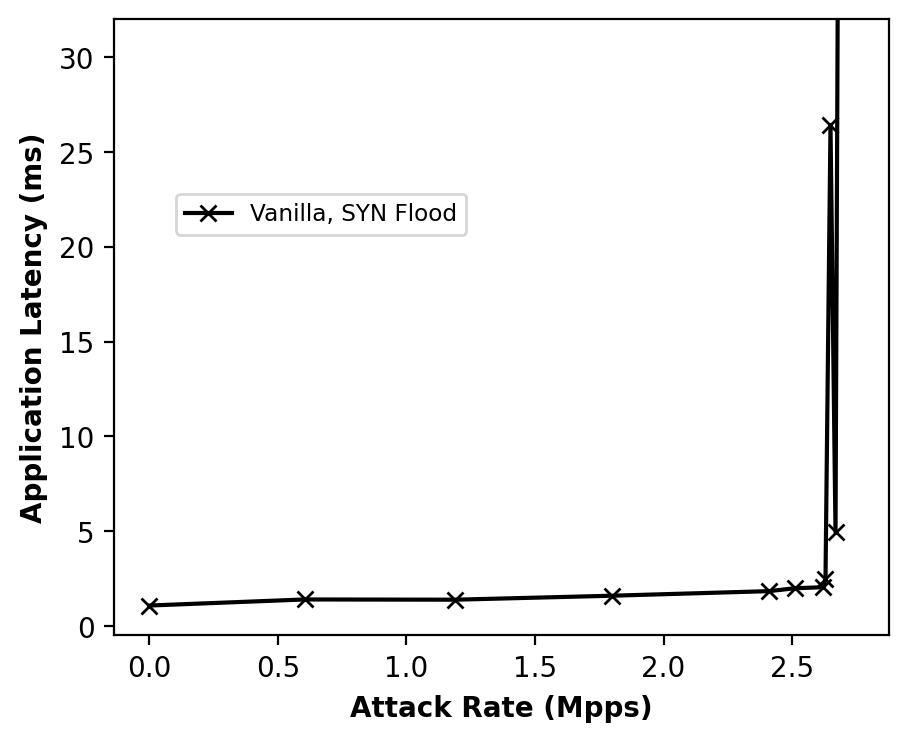

(0.0, 1.0782503333333333)

In [146]:

from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np

def plot_line(dir_name, color='r',style='-x', labels='l'):
    x,yvect=read_path_scaled(dir_name)
    m=[np.mean(v) for v in yvect]
    qL=[np.quantile(v,0.05) for v in yvect]
    qR=[np.quantile(v,0.95) for v in yvect]
    print(x)
    print(m)
    plt.plot(x,m,style,color=color, label=labels)
    
    plt.legend(loc=(0.08, 0.65),fontsize='small')
    plt.xlabel("Attack Rate (Mpps)", fontweight ='bold')
    plt.ylabel("Application Latency (ms)", fontweight ='bold')
    #plt.fill_between(x,qL,qR,alpha=0.2,color=color
figure(figsize = (5, 4), dpi = 200, facecolor='w')
plot_line("vanilla_synflood/", "k", "-x", "Vanilla, SYN Flood")
plt.ylim([-0.5,32])

plt.show()

x,yvect=read_path("vanilla_synflood/")
zero_y=np.mean(yvect[0])
x[0],zero_y

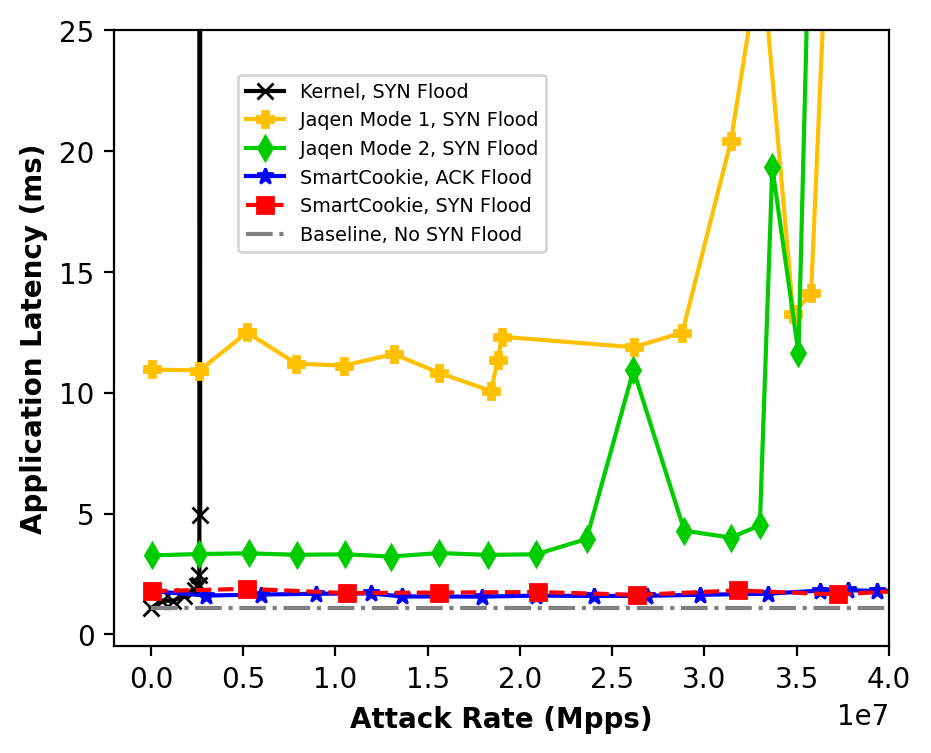

In [132]:

from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np

def plot_line(dir_name, color='r',style='-x', labels='l'):
    x,yvect=read_path(dir_name)
    m=[np.mean(v) for v in yvect]
    qL=[np.quantile(v,0.05) for v in yvect]
    qR=[np.quantile(v,0.95) for v in yvect]
    plt.plot(x,m,style,color=color, label=labels)
    
    plt.xlabel("Attack Rate (Mpps)", fontweight ='bold')
    plt.ylabel("Application Latency (ms)", fontweight ='bold')
    #plt.fill_between(x,qL,qR,alpha=0.2,color=color)
    
figure(figsize = (5, 4), dpi = 200, facecolor='w')
plot_line("vanilla_synflood/", "k", "-x", "Kernel, SYN Flood")

plot_line("jaqen_synflood/",  "#FFC000", '-P', "Jaqen Mode 1, SYN Flood")
plot_line("jaqen2_synflood/",  "#00CC00", "-d", "Jaqen Mode 2, SYN Flood")

plot_line("sc_ackflood/", "b", "-*", "SmartCookie, ACK Flood")
plot_line("sc_synflood/", "r", "--s", "SmartCookie, SYN Flood")

plt.ylim([-0.5,25])
plt.xlim([-0.2e7,4e7])
plt.hlines(zero_y,0,5e7,color='grey',linestyles='dashdot', label='Baseline, No SYN Flood')
plt.legend(loc=(0.16, 0.64),fontsize='x-small')

plt.savefig('latency_total.pdf')  
plt.show()



In [ ]:
1.3862940333333331 / 

vanilla_synflood/ 
Attack Rates:  [0.0, 0.6048, 1.1904, 1.799712, 2.409413, 2.509504, 2.61888, 2.629504, 2.64896, 2.66848, 2.679168, 2.739712] 
 Latencies:  [1.0782503333333333, 1.3987152333333335, 1.3862940333333331, 1.595979, 1.8372642744666667, 1.987988, 2.0455203666666666, 2.455315533333333, 26.429123368496665, 4.944338848929999, 39.8252275316, 53.44901449686333] 

jaqen_synflood/ 
Attack Rates:  [0.05184, 2.63552, 5.213376, 7.882237, 10.44401, 13.168064, 15.635506, 18.4378, 18.792512, 19.040719, 26.158205, 28.801238, 31.432864, 32.738068, 33.280866, 34.8203, 35.783205, 36.799805, 37.580008] 
 Latencies:  [10.9659831, 10.922423600000002, 12.4989509, 11.207888699999996, 11.124835899999997, 11.605856666666666, 10.8211024, 10.0746997, 11.342943066666669, 12.318921699999999, 11.8875372, 12.490889233333332, 20.405598869406663, 26.658112776323332, 26.52889791153333, 13.24558096966, 14.144410309846668, 31.87474708801334, 55.35460846232999] 

jaqen2_synflood/ 
Attack Rates:  [0.05184, 2.60

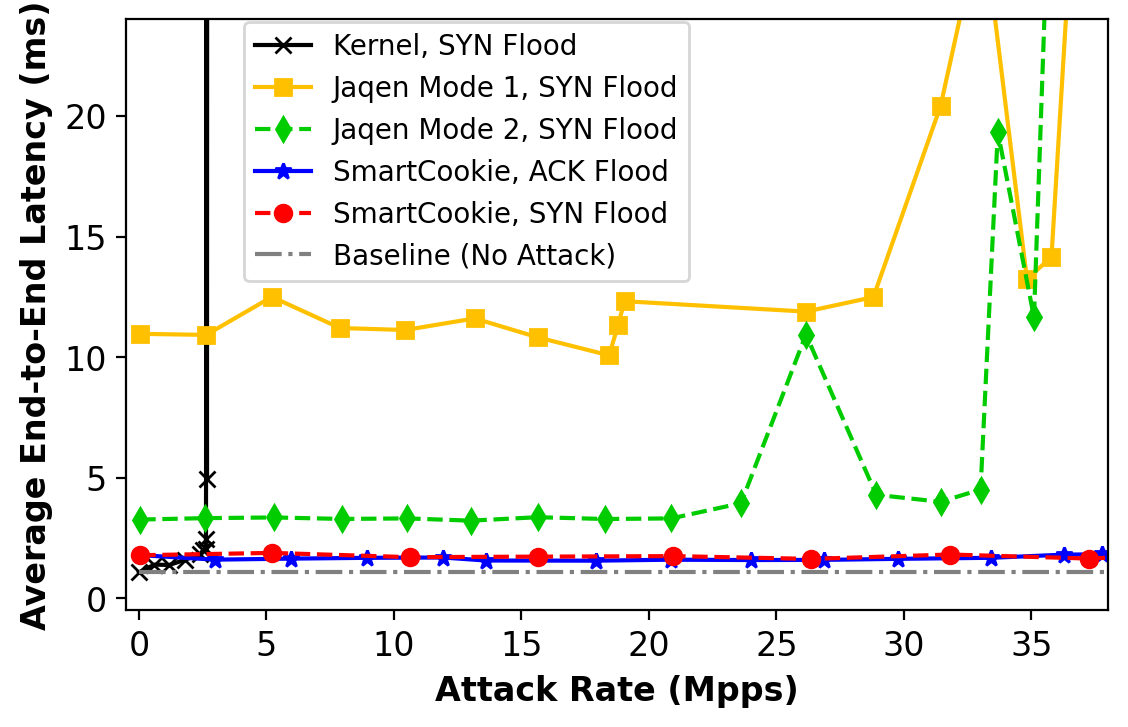

In [186]:
######## SCALED FIGURE #############



from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np

def plot_line(dir_name, color='r',style='-x', labels='l'):
    x,yvect=read_path_scaled(dir_name)
    m=[np.mean(v) for v in yvect]
    print(dir_name, "\nAttack Rates: ", x, "\n", "Latencies: ", m, "\n")
    qL=[np.quantile(v,0.05) for v in yvect]
    qR=[np.quantile(v,0.95) for v in yvect]
    plt.plot(x,m,style,color=color, label=labels)
    #plt.fill_between(x,qL,qR,alpha=0.2,color=color)
    
    

plt.rcParams['font.size']=12
figure(figsize = (5.8,3.8), dpi = 200, facecolor='w')

plot_line("vanilla_synflood/", "k", "-x", "Kernel, SYN Flood")

plot_line("jaqen_synflood/",  "#FFC000", '-s', "Jaqen Mode 1, SYN Flood")
plot_line("jaqen2_synflood/",  "#00CC00", "--d", "Jaqen Mode 2, SYN Flood")

plot_line("sc_ackflood/", "b", "-*", "SmartCookie, ACK Flood")
plot_line("sc_synflood/", "r", "--o", "SmartCookie, SYN Flood")

plt.ylim([-0.5,24])
plt.xlim([-0.5, 38])
plt.hlines(zero_y,0,5e7,color='grey',linestyles='dashdot', label='Baseline (No Attack)')
plt.legend(loc=(0.12, 0.557),fontsize=10)
plt.xlabel("Attack Rate (Mpps)", fontweight ='bold')
plt.ylabel("Average End-to-End Latency (ms)", fontweight ='bold')
plt.tight_layout()

plt.savefig('latency_total.pdf')  
plt.show()



In [14]:


#########################################
#SmartCookie SYN Flood on Lucid Testbed.# 
#########################################
dir_path = "data/latency/lucid/"
dir_name = "sc_synflood/"
sc_syn_raw_data = get_raw_data(dir_path, dir_name)
sc_syn_flood_rate = get_flood_rates(sc_syn_raw_data)
sc_syn_flood_rate_scaled = get_scaled_flood_rates(sc_syn_flood_rate)
sc_syn_curl_latency = get_latencies(sc_syn_raw_data, False)
sc_syn_curl_latency_scaled = get_scaled_latencies(sc_syn_curl_latency)
print("SMARTCOOKIE SYN FLOOD, ATTACK RATES: ", sc_syn_flood_rate_scaled)
print("SMARTCOOKIE SYN FLOOD, CURL LATENCIES: ", sc_syn_curl_latency_scaled)
print()

#########################################
#SmartCookie ACK Flood on Lucid Testbed.# 
#########################################
dir_path = "data/latency/lucid/"
dir_name = "sc_ackflood/"
sc_ack_raw_data = get_raw_data(dir_path, dir_name)
sc_ack_flood_rate = get_flood_rates(sc_ack_raw_data)
sc_ack_flood_rate_scaled = get_scaled_flood_rates(sc_ack_flood_rate)
sc_ack_curl_latency = get_latencies(sc_ack_raw_data, False)
sc_ack_curl_latency_scaled = get_scaled_latencies(sc_ack_curl_latency)
print("SMARTCOOKIE ACK FLOOD, ATTACK RATES: ", sc_ack_flood_rate_scaled)
print("SMARTCOOKIE ACK FLOOD, CURL LATENCIES: ", sc_ack_curl_latency_scaled)
print()

################################################
####Jaqen Mode 1 SYN Flood on Lucid Testbed.#### 
################################################
dir_path = "data/latency/lucid/"
dir_name = "jaqen_synflood/"
jaqen_syn_raw_data = get_raw_data(dir_path, dir_name)
jaqen_syn_flood_rate = get_flood_rates(jaqen_syn_raw_data)
jaqen_syn_flood_rate_scaled = get_scaled_flood_rates(jaqen_syn_flood_rate)
jaqen_syn_curl_latency = get_latencies(jaqen_syn_raw_data, False)
jaqen_syn_curl_latency_scaled = get_scaled_latencies(jaqen_syn_curl_latency)
print("JAQEN SYN FLOOD, ATTACK RATES: ",jaqen_syn_flood_rate_scaled)
print("JAQEN SYN FLOOD, CURL LATENCIES: ",jaqen_syn_curl_latency_scaled)
print()

################################################
####Jaqen Mode 2 SYN Flood on Lucid Testbed.#### 
################################################
dir_path = "data/latency/lucid/"
dir_name = "jaqen2_synflood/"
jaqen2_syn_raw_data = get_raw_data(dir_path, dir_name)
jaqen2_syn_flood_rate = get_flood_rates(jaqen2_syn_raw_data)
jaqen2_syn_flood_rate_scaled = get_scaled_flood_rates(jaqen2_syn_flood_rate)
jaqen2_syn_curl_latency_scaled = get_latencies(jaqen2_syn_raw_data, True)
# Note that latencies are already in ms, so don't need to scale. 
# jaqen2_syn_curl_latency_scaled = get_scaled_latencies(jaqen2_syn_curl_latency)
print("JAQEN MODE 2 SYN FLOOD, ATTACK RATES: ",jaqen2_syn_flood_rate_scaled)
print("JAQEN MODE 2 SYN FLOOD, CURL LATENCIES: ",jaqen2_syn_curl_latency_scaled)
print()


#########################################
###Vanilla SYN Flood on Lucid Testbed.###
#########################################
dir_path = "data/latency/lucid/"
dir_name = "vanilla_synflood/"
vanilla_syn_raw_data = get_raw_data(dir_path, dir_name)
vanilla_syn_flood_rate = get_flood_rates(vanilla_syn_raw_data)
vanilla_syn_flood_rate_scaled = get_scaled_flood_rates(vanilla_syn_flood_rate)
vanilla_syn_curl_latency = get_latencies(vanilla_syn_raw_data, False)
vanilla_syn_curl_latency_scaled = get_scaled_latencies(vanilla_syn_curl_latency)
print("VANILLA SYN FLOOD, ATTACK RATES: ",vanilla_syn_flood_rate_scaled)
print("VANILLA SYN FLOOD, CURL LATENCIES: ",vanilla_syn_curl_latency_scaled)
print()


NameError: name 'get_scaled_flood_rates' is not defined

In [93]:
import numpy as np
#[[float(i.split(':')[-1]) for i in x] for x in jaqen_syn_raw_data.values()]

jaqen_syn_raw_data[0]

(59328.0,
 ['0.013469:0.015771:0.016386',
  '0.012938:0.015175:0.015828',
  '0.011813:0.014134:0.014762',
  '0.013220:0.015559:0.016160',
  '0.012652:0.014878:0.015538',
  '0.012848:0.015094:0.015844',
  '0.013093:0.015443:0.016124',
  '0.012851:0.015100:0.015799',
  '0.012699:0.015009:0.015729',
  '0.012954:0.015129:0.015815',
  '0.013039:0.015363:0.016047',
  '0.013718:0.015976:0.016641',
  '0.013116:0.015374:0.016110',
  '0.012573:0.014818:0.015486',
  '0.012977:0.015223:0.015841',
  '0.014150:0.016448:0.017102',
  '0.009871:0.012098:0.012666',
  '0.014415:0.016677:0.017238',
  '0.014022:0.016396:0.017024',
  '0.013903:0.016279:0.017014',
  '0.013361:0.015471:0.016152',
  '0.010013:0.012351:0.012992',
  '0.009864:0.012204:0.012823',
  '0.010033:0.012400:0.013081',
  '0.013887:0.016175:0.017005',
  '0.009869:0.012168:0.012911',
  '0.013568:0.015885:0.016508',
  '0.010084:0.012398:0.012979',
  '0.009766:0.012026:0.012634',
  '0.013805:0.016146:0.016793'])

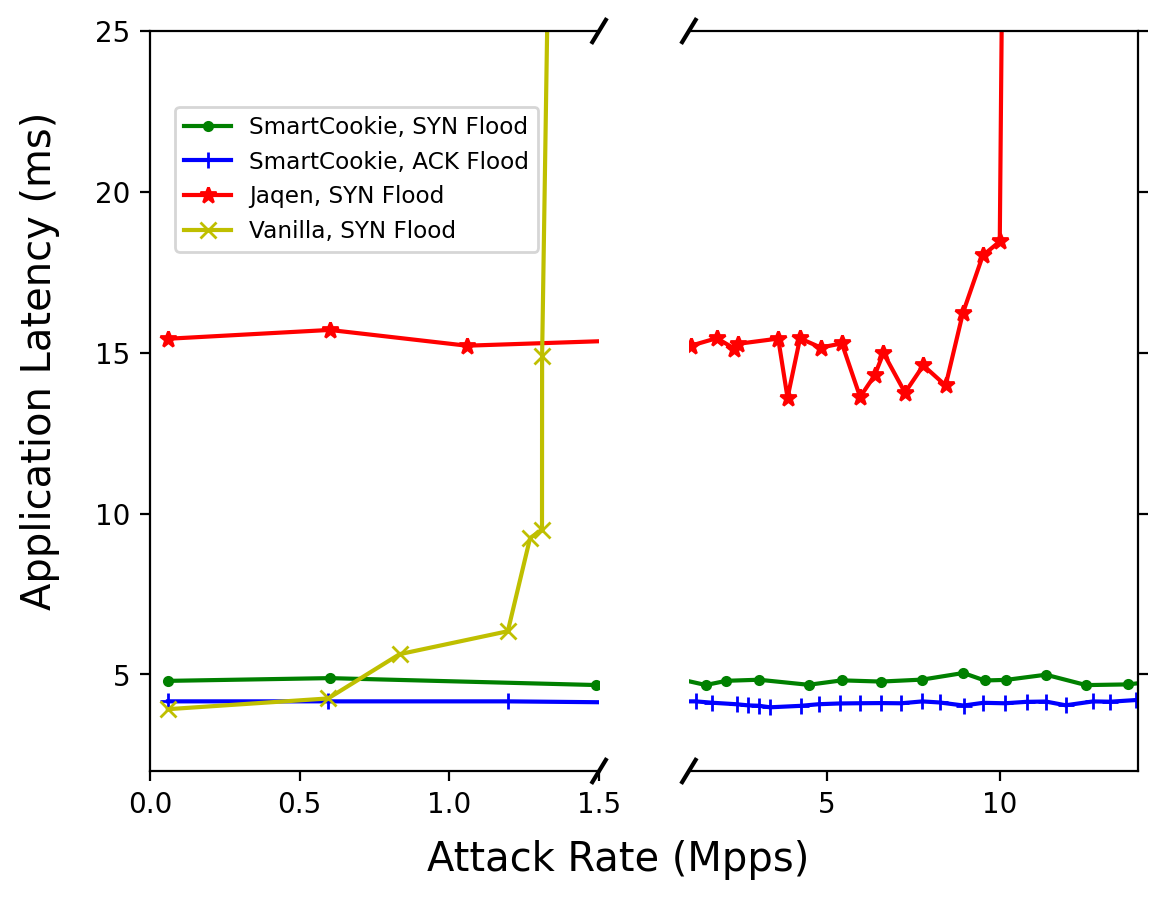

In [47]:
#Plot DDoS Attack Rate versus Application Latency

from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np


x_sc_syn = sc_syn_flood_rate_scaled 
y_sc_syn = sc_syn_curl_latency_scaled

x_sc_ack = sc_ack_flood_rate_scaled 
y_sc_ack = sc_ack_curl_latency_scaled

x_jaqen_syn = jaqen_syn_flood_rate_scaled 
y_jaqen_syn = jaqen_syn_curl_latency_scaled

x_vanilla_syn = vanilla_syn_flood_rate_scaled 
y_vanilla_syn = vanilla_syn_curl_latency_scaled

f,(ax,ax2) = plt.subplots(1,2, facecolor='w', figsize=(6.5, 5), dpi=200)

# plot the same data on both axes
#use dashes/dots
ax.plot(x_sc_syn, y_sc_syn, "g",  marker='.', label="SmartCookie, SYN Flood")
ax.plot(x_sc_ack, y_sc_ack, "b",  marker='+', label="SmartCookie, ACK Flood")
ax.plot(x_jaqen_syn, y_jaqen_syn, "r",  marker='*', label="Jaqen, SYN Flood")
ax.plot(x_vanilla_syn, y_vanilla_syn, "y",  marker='x', label="Vanilla, SYN Flood")

ax2.plot(x_sc_syn, y_sc_syn, "g",  marker='.', label="SmartCookie, SYN Flood")
ax2.plot(x_sc_ack, y_sc_ack, "b",  marker='+', label="SmartCookie, ACK Flood")
ax2.plot(x_jaqen_syn, y_jaqen_syn, "r",  marker='*', label="Jaqen, SYN Flood")
# ax2.plot(x_vanilla_syn, y_vanilla_syn, "y",  marker='x', label="Vanilla, SYN Flood")

ax.set_xlim(0,1.5)
ax2.set_xlim(1,14)

ax.set_ylim(2, 25)
ax2.set_ylim(2, 25)


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.tick_params(labelright=False)


# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(True)
ax2.spines['top'].set_visible(True)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax.tick_params(labelbottom=True) 
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()


d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
#ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
#ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
#ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#x-axis
f.text(0.50, 0.04, 'Attack Rate (Mpps)', ha='center', fontsize='x-large')
#y-axis
f.text(0.04, 0.55, 'Application Latency (ms)', va='center', rotation='vertical', fontsize='x-large')
plt.subplots_adjust(left=0.14, bottom=0.14)

handles_1, labels_1 = ax.get_legend_handles_labels()
f.legend(handles_1, labels_1, loc=(0.15, 0.72),fontsize='small')
#handles_2, labels_2 = ax2.get_legend_handles_labels()
#f.legend(handles_2, labels_2, loc=(0.65, 0.865))

#add reference lines 
#l1=ax.axhline(0.5,color='black',ls=':')
#l1.set_label('l1')
#l1=ax2.axhline(0.5,color='black',ls=':')
#l1.set_label('l1')

# plt.savefig('latency_total.pdf')  

plt.show()




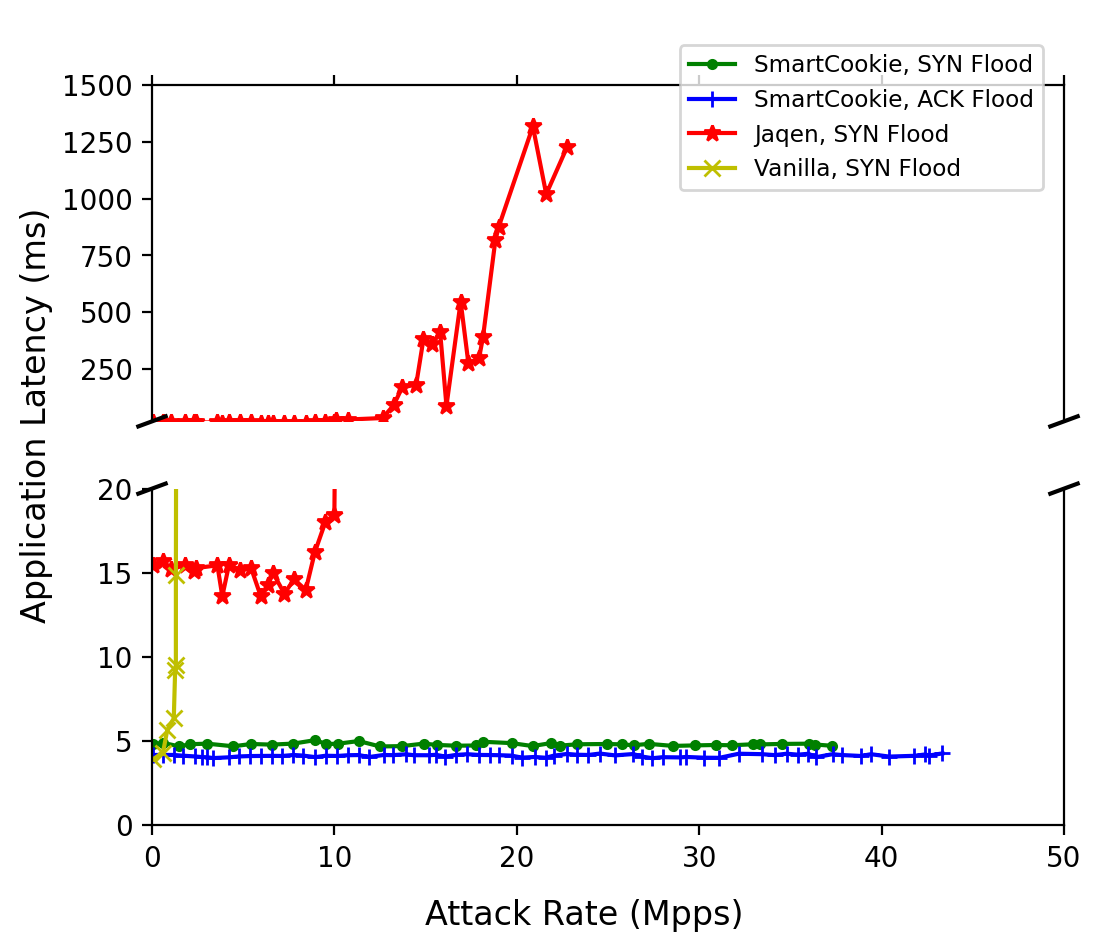

In [49]:
#Plot DDoS Attack Rate versus Application Latency

from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np


x_sc_syn = sc_syn_flood_rate_scaled 
y_sc_syn = sc_syn_curl_latency_scaled

x_sc_ack = sc_ack_flood_rate_scaled 
y_sc_ack = sc_ack_curl_latency_scaled

x_jaqen_syn = jaqen_syn_flood_rate_scaled 
y_jaqen_syn = jaqen_syn_curl_latency_scaled

x_vanilla_syn = vanilla_syn_flood_rate_scaled 
y_vanilla_syn = vanilla_syn_curl_latency_scaled


# figure(figsize = (6, 5), dpi = 200, facecolor='w')
# plt.plot(x_sc_syn, y_sc_syn, "g",  marker='.', label="SmartCookie SYN Flood")
# plt.plot(x_sc_ack, y_sc_ack, "b",  marker='s', label="SmartCookie ACK Flood")
# plt.plot(x_jaqen_syn, y_jaqen_syn, "r",  marker='*', label="Jaqen SYN Flood")

# plt.legend(loc="upper right")
# plt.xlabel("SYN Flood Attack Rate (Mpps)")
# plt.ylabel("Latencies (ms)")
# plt.show()



f,(ax,ax2) = plt.subplots(2, 1, sharex=True, facecolor='w', figsize=(6, 5), dpi=200)


# plot the same data on both axes
#use dashes/dots
# ax.plot(x_sc_syn, y_sc_syn, "g",  marker='.', label="SmartCookie, SYN Flood")
# ax.plot(x_sc_ack, y_sc_ack, "b",  marker='+', label="SmartCookie, ACK Flood")
ax.plot(x_jaqen_syn, y_jaqen_syn, "r",  marker='*', label="Jaqen, SYN Flood")

ax2.plot(x_sc_syn, y_sc_syn, "g",  marker='.', label="SmartCookie, SYN Flood")
ax2.plot(x_sc_ack, y_sc_ack, "b",  marker='+', label="SmartCookie, ACK Flood")
ax2.plot(x_jaqen_syn, y_jaqen_syn, "r",  marker='*', label="Jaqen, SYN Flood")
ax2.plot(x_vanilla_syn, y_vanilla_syn, "y",  marker='x', label="Vanilla, SYN Flood")

ax.set_xlim(0,50)
ax2.set_xlim(0,50)

ax.set_ylim(20,1500)
ax2.set_ylim(0, 20)


# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#x-axis
f.text(0.50, 0.04, 'Attack Rate (Mpps)', ha='center', fontsize='large')
#y-axis
f.text(0.03, 0.55, 'Application Latency (ms)', va='center', rotation='vertical', fontsize='large')
plt.subplots_adjust(left=0.14, bottom=0.14)

handles_1, labels_1 = ax2.get_legend_handles_labels()
f.legend(handles_1, labels_1, loc=(0.615, 0.80), fontsize='small')
#handles_2, labels_2 = ax2.get_legend_handles_labels()
#f.legend(handles_2, labels_2, loc=(0.65, 0.865))


# plt.savefig('latency_total.pdf')  



# # hide the spines between ax and ax2
# ax.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# #ax.yaxis.tick_left()
# ax2.yaxis.tick_right()
# ax2.tick_params(labelright=False)


# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(True)
# ax2.spines['top'].set_visible(True)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax.tick_params(labelbottom=True) 
# ax.xaxis.tick_bottom()
# ax2.xaxis.tick_bottom()







# d = .015 # how big to make the diagonal lines in axes coordinates
# # arguments to pass plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d,1+d), (-d,+d), **kwargs)
# ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((-d,+d), (-d,+d), **kwargs)


# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# #ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# #ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# #ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# #ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# #x-axis
# f.text(0.50, 0.04, 'SYN Flood Attack Rate (Mpps)', ha='center', fontsize='large')
# #y-axis
# f.text(0.04, 0.55, 'Application Latency (ms)', va='center', rotation='vertical', fontsize='large')
# plt.subplots_adjust(left=0.14, bottom=0.14)

# handles_1, labels_1 = ax.get_legend_handles_labels()
# f.legend(handles_1, labels_1, loc=(0.15, 0.75))
# #handles_2, labels_2 = ax2.get_legend_handles_labels()
# #f.legend(handles_2, labels_2, loc=(0.65, 0.865))


# plt.savefig('latency_total.pdf')  





In [65]:
# Plot all data on a single continuous figure. 


from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np

x_sc_syn = sc_syn_flood_rate_scaled 
y_sc_syn = sc_syn_curl_latency_scaled

x_sc_ack = sc_ack_flood_rate_scaled 
y_sc_ack = sc_ack_curl_latency_scaled

x_jaqen_syn = jaqen_syn_flood_rate_scaled 
y_jaqen_syn = jaqen_syn_curl_latency_scaled

x_jaqen2_syn = jaqen2_syn_flood_rate_scaled 
y_jaqen2_syn = jaqen2_syn_curl_latency_scaled

x_vanilla_syn = vanilla_syn_flood_rate_scaled 
y_vanilla_syn = vanilla_syn_curl_latency_scaled

figure(figsize = (5,4), dpi = 200, facecolor='w')
plt.plot(x_vanilla_syn, y_vanilla_syn, "k",  marker='x', label="Vanilla, SYN Flood")
plt.plot(x_jaqen_syn, y_jaqen_syn, "r",  marker='*', label="Jaqen Mode 1, SYN Flood")
plt.plot(x_jaqen2_syn, y_jaqen2_syn, "y",  marker='d', label="Jaqen Mode 2, SYN Flood")
plt.plot(x_sc_syn, y_sc_syn, "#00D100",  marker='.', label="SmartCookie, SYN Flood")
plt.plot(x_sc_ack, y_sc_ack, "b",  marker='s', label="SmartCookie, ACK Flood")

plt.ylim(0, 25)
plt.xlim(0,25)

plt.legend(loc=(0.51, 0.70),fontsize=8)

plt.xlabel("Attack Rate (Mpps)", fontweight ='bold')
plt.ylabel("Application Latency (ms)", fontweight ='bold')

plt.savefig('latency_total.pdf')  

plt.show()

NameError: name 'sc_syn_curl_latency_scaled' is not defined